# LLM Experiment - Llama 3 70B (other classes)
In this experiment, we use the best-performing model with other fields, to see how well it performs.

Hypothesis: it will perform very well on specific fields like quantitative finance/biology and physics, but poorly on more general fields like mathematics.

(Note: it appears that there is no dataset associated with this experiment. This experiment has been supplanted by test set version, which should provide better results)

In [2]:
from groq import Groq
import pandas as pd
import time

### Part 1: Physics

In [3]:
client = Groq(
    api_key="",
)

In [8]:
def label_abstract_physics(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the physics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    return int(chat_completion.choices[0].message.content)

**Import data and run the model**:

In [4]:
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [6]:
df_labeled = pd.DataFrame()
df_labeled["abstract"] = df["ABSTRACT"][:200]
df_labeled["Physics_actual"] = df["Physics"][:200]
df_labeled

,abstract,Physics_actual
0,Predictive models allow subject-specific inf...,0
1,Rotation invariance and translation invarian...,0
2,We introduce and develop the notion of spher...,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0
4,Fourier-transform infra-red (FTIR) spectra o...,0
...,...,...
195,We relate the concepts used in decentralized...,0
196,Time-varying network topologies can deeply i...,0
197,A long-standing obstacle to progress in deep...,0
198,We study the band structure topology and eng...,1


In [11]:
df_labeled['Llama3_70B_Physics'] = df_labeled['abstract'].apply(label_abstract_physics)

**Evaluating Llama3 70B for Physics**

<Axes: >

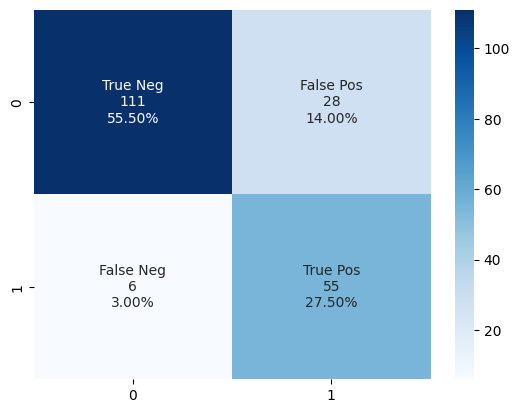

In [15]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['Physics_actual'], df_labeled['Llama3_70B_Physics'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [16]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.83

In [17]:
# Precision: positive predictive value; of those predicted as CS documents, how many were actually CS documents?
precision = (tp)/(tp+fp)
precision

0.6626506024096386

In [18]:
# Recall: of those that were actually CS documents, how many were predicted as CS documents?
recall = (tp)/(tp+fn)
recall

0.9016393442622951

In [19]:
# F1 score: tries to balance precision and recall, with uneven class distribution (large number of actual negs)
f1 = 2*((precision*recall)/(precision+recall))
f1

0.7638888888888888

### Part 2: Math

In [20]:
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [22]:
df_labeled["Math_actual"] = df["Mathematics"][:200]
df_labeled

,abstract,Physics_actual,Llama3_70B_Physics,Math_actual
0,Predictive models allow subject-specific inf...,0,0,0
1,Rotation invariance and translation invarian...,0,0,0
2,We introduce and develop the notion of spher...,0,1,1
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,1,1
4,Fourier-transform infra-red (FTIR) spectra o...,0,0,0
...,...,...,...,...
195,We relate the concepts used in decentralized...,0,0,0
196,Time-varying network topologies can deeply i...,0,0,0
197,A long-standing obstacle to progress in deep...,0,0,0
198,We study the band structure topology and eng...,1,1,0


In [24]:
def label_abstract_math(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the mathematics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    return int(chat_completion.choices[0].message.content)

In [25]:
df_labeled['Llama3_70B_Math'] = df_labeled['abstract'].apply(label_abstract_math)

**Evaluating Llama 3 70B - Math**

<Axes: >

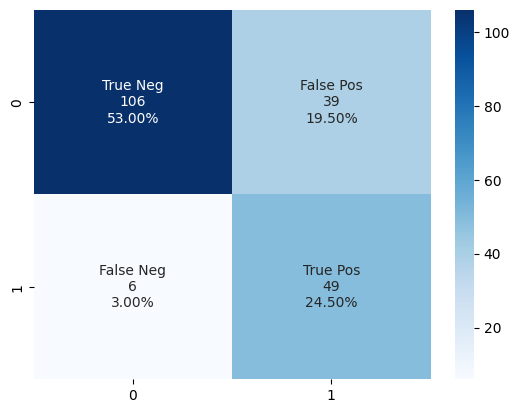

In [28]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['Math_actual'], df_labeled['Llama3_70B_Math'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [30]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.775

In [32]:
df_labeled["Stats_actual"] = df["Statistics"][:200]
df_labeled

,abstract,Physics_actual,Llama3_70B_Physics,Math_actual,Llama3_70B_Math,Stats_actual
0,Predictive models allow subject-specific inf...,0,0,0,0,0
1,Rotation invariance and translation invarian...,0,0,0,0,0
2,We introduce and develop the notion of spher...,0,1,1,1,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,1,1,1,0
4,Fourier-transform infra-red (FTIR) spectra o...,0,0,0,0,1
...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0,0,0,0,0
196,Time-varying network topologies can deeply i...,0,0,0,0,0
197,A long-standing obstacle to progress in deep...,0,0,0,0,1
198,We study the band structure topology and eng...,1,1,0,0,0


In [33]:
def label_abstract_statistics(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the statistics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    return int(chat_completion.choices[0].message.content)

In [34]:
df_labeled['Llama3_70B_Stats'] = df_labeled['abstract'].apply(label_abstract_statistics)

<Axes: >

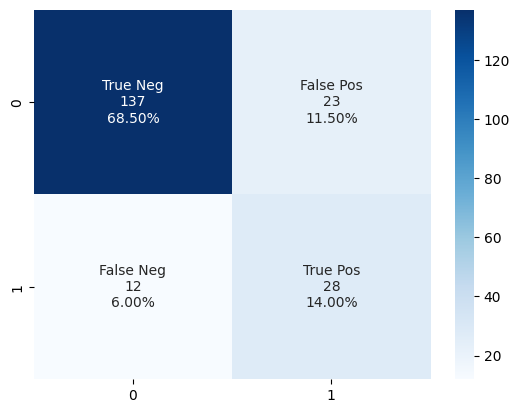

In [37]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['Stats_actual'], df_labeled['Llama3_70B_Stats'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [38]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.825

### The last two

In [4]:
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
df_labeled = pd.DataFrame()
df_labeled["abstract"] = df["ABSTRACT"][:200]
df_labeled["QB_Actual"] = df["Quantitative Biology"][:200]
df_labeled

,abstract,QB_Actual
0,Predictive models allow subject-specific inf...,0
1,Rotation invariance and translation invarian...,0
2,We introduce and develop the notion of spher...,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0
4,Fourier-transform infra-red (FTIR) spectra o...,0
...,...,...
195,We relate the concepts used in decentralized...,1
196,Time-varying network topologies can deeply i...,1
197,A long-standing obstacle to progress in deep...,0
198,We study the band structure topology and eng...,0


In [6]:
def label_abstract_qb(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the quantitative biology field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    return int(chat_completion.choices[0].message.content)

In [7]:
df_labeled['Llama3_70B_QB'] = df_labeled['abstract'].apply(label_abstract_qb)

<Axes: >

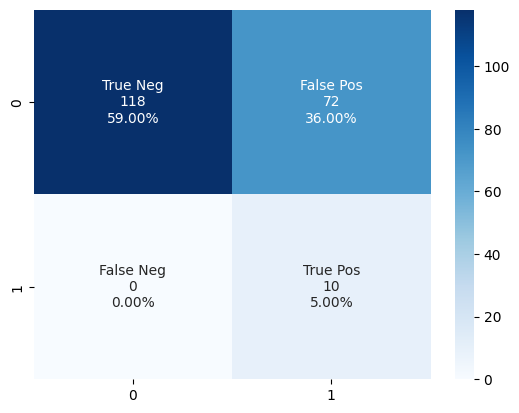

In [10]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['QB_Actual'], df_labeled['Llama3_70B_QB'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [11]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.64

It looks like there are very few QBs in this dataset, which might skew the #s a little bit.

In [12]:
df_labeled["QF_Actual"] = df["Quantitative Finance"][:200]
df_labeled

,abstract,QB_Actual,Llama3_70B_QB,QF_Actual
0,Predictive models allow subject-specific inf...,0,1,0
1,Rotation invariance and translation invarian...,0,0,0
2,We introduce and develop the notion of spher...,0,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,1,0
4,Fourier-transform infra-red (FTIR) spectra o...,0,1,0
...,...,...,...,...
195,We relate the concepts used in decentralized...,1,1,0
196,Time-varying network topologies can deeply i...,1,1,0
197,A long-standing obstacle to progress in deep...,0,0,0
198,We study the band structure topology and eng...,0,0,0


In [13]:
def label_abstract_qf(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the quantitative finance field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    return int(chat_completion.choices[0].message.content)

In [14]:
df_labeled['Llama3_70B_QF'] = df_labeled['abstract'].apply(label_abstract_qf)

In [15]:
df_labeled.to_csv('QF.csv')

<Axes: >

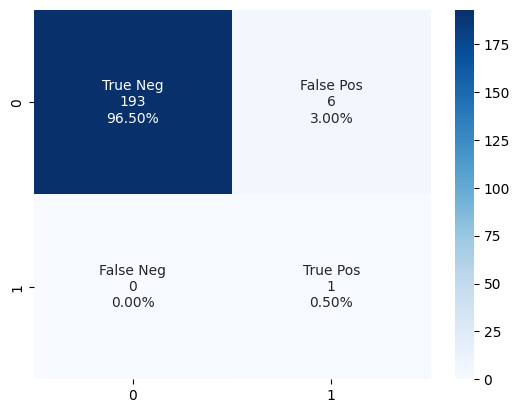

In [16]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['QF_Actual'], df_labeled['Llama3_70B_QF'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [17]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.97

In [22]:
len(df[:10000][df[:10000]['Quantitative Finance'] == 1])

120

In [23]:
len(df)

20972